<h2 align="center">Projeto 4</h2>
<p align="center">
  Matéria: Álgebra Linear Numérica<br>
  Professor: Bernardo Freitas<br>
  Alunos: Bruno Ferreira Salvi e Elisa de Oliveira Soares<br>
  Data: 06/2025
</p>


Imports ao longo do trabalho:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy.special import kv  
from scipy.stats import norm

### Questão 1. Matrizes Gaussianas. Uma matriz gaussiana tem todas as entradas Aij independentes e distribuídas segundo uma normal padrão, ou seja, Aij ∼ N (0, 1).

### a) Distribuição das normas. Faça um histograma da norma-2 das colunas de uma matriz gaussiana A, m × n. Use vários valores de m, e comente o que você observa.

Text(0.5, 1.02, 'Histograma das normas-2 das colunas de uma matriz gaussiana')

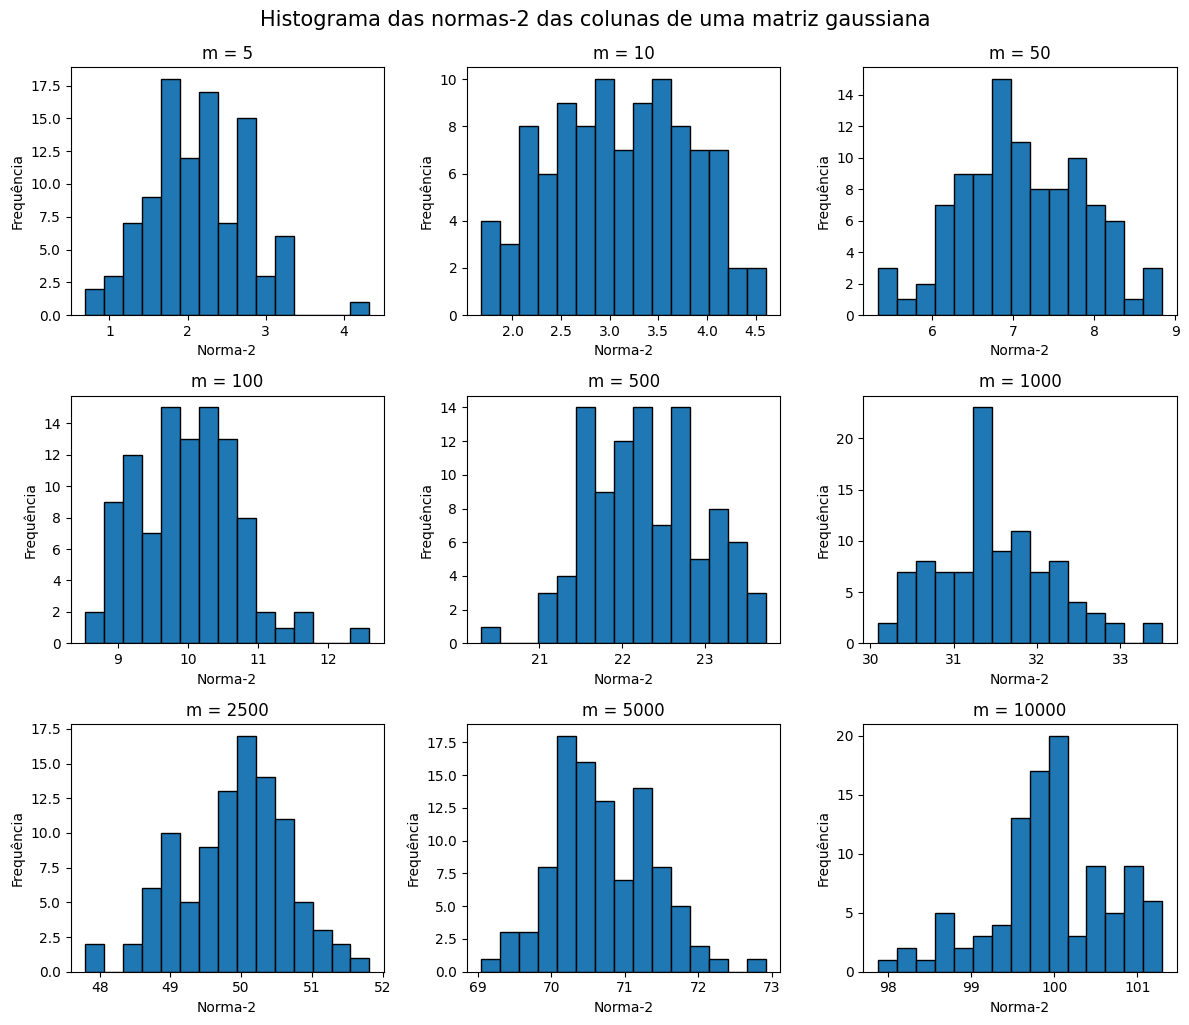

In [3]:
m_s = [5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
i=0

plt.figure(figsize=(12, 10))

for m in m_s:
    A = np.random.normal(0, 1, size=(m, 100)) # ESCOLHER UM n
    
    # Calcula norma-2 das colunas
    normas = np.linalg.norm(A, axis=0)
    i += 1
    
    # Plota histograma
    plt.subplot(3, 3, i)
    plt.hist(normas, bins=15, edgecolor='black')
    plt.title(f"m = {m}")
    plt.xlabel("Norma-2")
    plt.ylabel("Frequência")

plt.tight_layout()
plt.suptitle("Histograma das normas-2 das colunas de uma matriz gaussiana", fontsize=15, y=1.02)

Ao observarmos os historiogramas, é possível perceber que o valor da norma-2 das colunas é próximo de $\sqrt{m}$. Isso ocorre pois a norma dois de um vetor é $\sqrt{a_1^2 + a_2^2 + \dots + a_m^2}$, para um vetor $1 \times m$, que é o caso de todo vetor da nossa matriz A. Porém, na nossa matriz A, todo elemento é gerado da mesma forma ($a \sim \mathcal{N}(0, 1)$), logo a norma dois do vetor será $\sqrt{m \cdot E(a^2)}$. Como $E(a) = \mu = 0$, $Var (a) = \sigma^2 = 1$, e $Var(a) = E(a^2) - (E(a))^2$, temos que $E(a^2) = Var(a) - (E(a))^2$. Logo, $E(a^2) = 1 - 0^2 = 1$. Assim, temos que a norma 2 do vetor será sempre próximo de $\sqrt{m \cdot E(a^2)} = \sqrt{m \cdot 1}= \sqrt{m}$, como podemos observar no historiograma.

### b) Produtos internos. Agora, fixe m = 100 e faça o histograma do produto interno ⟨Ai, Aj ⟩ entre colunas de uma matriz gaussiana A. Exclua os casos i = j, e use n = 100, 200, 500 e 1000. O que acontece? Qual parece ser a distribuição para n → ∞?

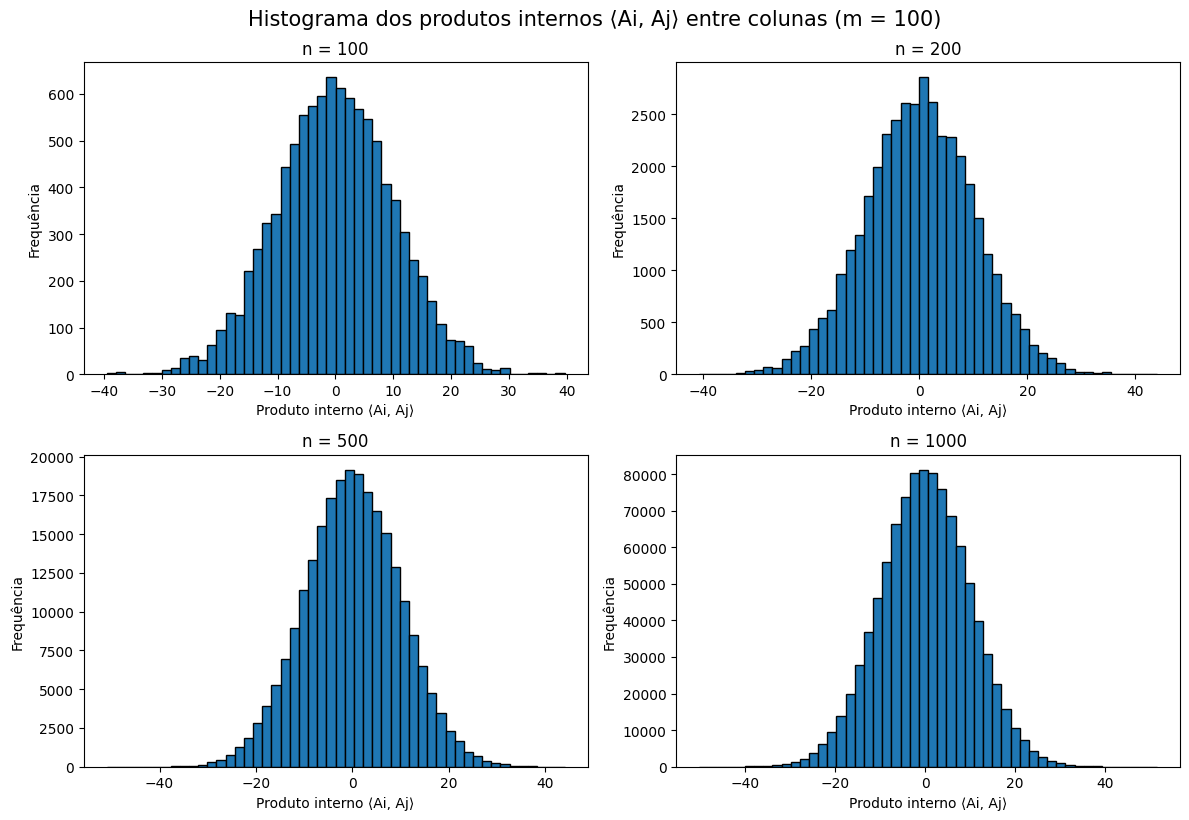

In [4]:
n_s = [100, 200, 500, 1000]
i=0

plt.figure(figsize=(12, 8))

for n in n_s:
    A = np.random.normal(0, 1, size=(100, n)) 
    
    G = A.T @ A 
    produtos_internos = G[~np.eye(n, dtype=bool)] # Remove os elementos da diagonal
    i += 1
    
    # Plota histograma
    plt.subplot(2, 2, i)
    plt.hist(produtos_internos, bins=50, edgecolor='black')
    plt.title(f"n = {n}")
    plt.xlabel("Produto interno ⟨Ai, Aj⟩")
    plt.ylabel("Frequência")

plt.tight_layout()
plt.suptitle("Histograma dos produtos internos ⟨Ai, Aj⟩ entre colunas (m = 100)", fontsize=15, y=1.02)
plt.show()

A distribuição de $\langle A_i, A_j \rangle$, para $i \ne j$, se assemelha à distribuição normal quando $n \to \infty$. Isso acontece porque, sendo $\langle a_i, a_j \rangle = \sqrt{a_{1,i} \cdot a_{1,j} + a_{2,i} \cdot a_{2,j} + \dots + a_{m,i} \cdot a_{m,j}}, \forall \  i, j$ e todo elemento gerado da mesma forma ($a \sim \mathcal{N}(0, 1)$) de maneiras independentes, Esses produtos tem esperança zero e são simétricos, tal qual a distribuição normal. Porém, apesar de quando consideramos muitos deles eles se assemelharem visualmente a uma distribuição normal, 




logo a norma dois do vetor será $\sqrt{m \cdot E(a^2)}$.



procurar sobre função de Bessel, pode encaixar

### c) A distribuição do máximo. Queremos ver quão “não ortogonal” é a matriz A. Para isto, vamos estudar o máximo de |⟨Ai,Aj⟩| / ∥Ai∥∥Aj∥ entre colunas distintas de uma matriz gaussiana A. Para isto, gere K = 1000 matrizes gaussianas Ak de ordem 100 × 300, calcule o máximo indicado acima, e faça um histograma dos K valores obtidos.

In [5]:
k1 = 1500

# < Método com loops >
start = time.time()

hist_max_ks_loop = []

def similaridade_cosseno(a, b):
    num = np.abs(np.dot(a, b))
    den = np.linalg.norm(a) * np.linalg.norm(b)
    return num / den

for _ in range(k1):
    A = np.random.normal(0, 1, (100, 300))
    hist_ks = []
    for i in range(len(A.T)):
        for j in range(i + 1, len(A.T)):
            a = similaridade_cosseno(A[:, i], A[:, j])
            hist_ks.append(a)

    hist_max_ks_loop.append(np.max(hist_ks))

end = time.time()
tempo_loop = end - start


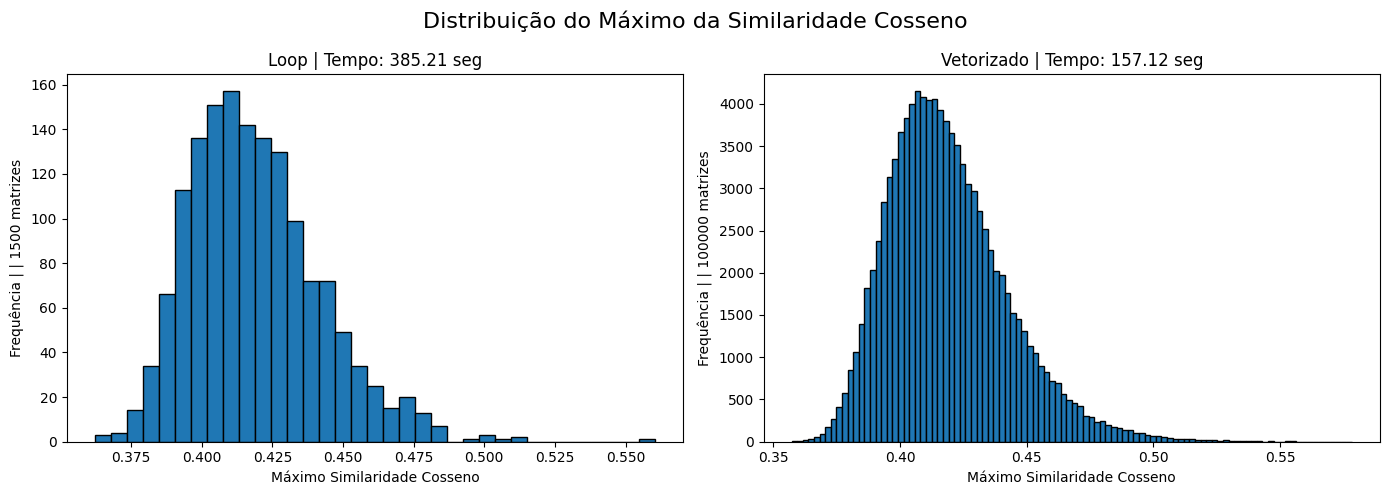

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(hist_max_ks_loop, bins=35, edgecolor='black')
axes[0].set_title(f"Loop | Tempo: {tempo_loop:.2f} seg")
axes[0].set_xlabel("Máximo Similaridade Cosseno")
axes[0].set_ylabel(f"Frequência | | {k1} matrizes")

k2 = 100000

# < Método verotizado >
start = time.time()

hist_max_ks_vec = []

for _ in range(k2):
    A = np.random.normal(0, 1, (100, 300))

    norms = np.linalg.norm(A, axis=0)
    A_normalizado = A / norms

    S = np.abs(A_normalizado.T @ A_normalizado)
    np.fill_diagonal(S, 0)

    hist_max_ks_vec.append(np.max(S))

end = time.time()
tempo_vec = end - start


axes[1].hist(hist_max_ks_vec, bins=100, edgecolor='black')
axes[1].set_title(f"Vetorizado | Tempo: {tempo_vec:.2f} seg")
axes[1].set_xlabel("Máximo Similaridade Cosseno")
axes[1].set_ylabel(f"Frequência | | {k2} matrizes")

plt.suptitle("Distribuição do Máximo da Similaridade Cosseno", fontsize=16)
plt.tight_layout()


### d) Complexidade computacional. Qual a complexidade de calcular o máximo acima? Qual valor de K você acha que seria bom para ter uma boa estimativa do máximo esperado?

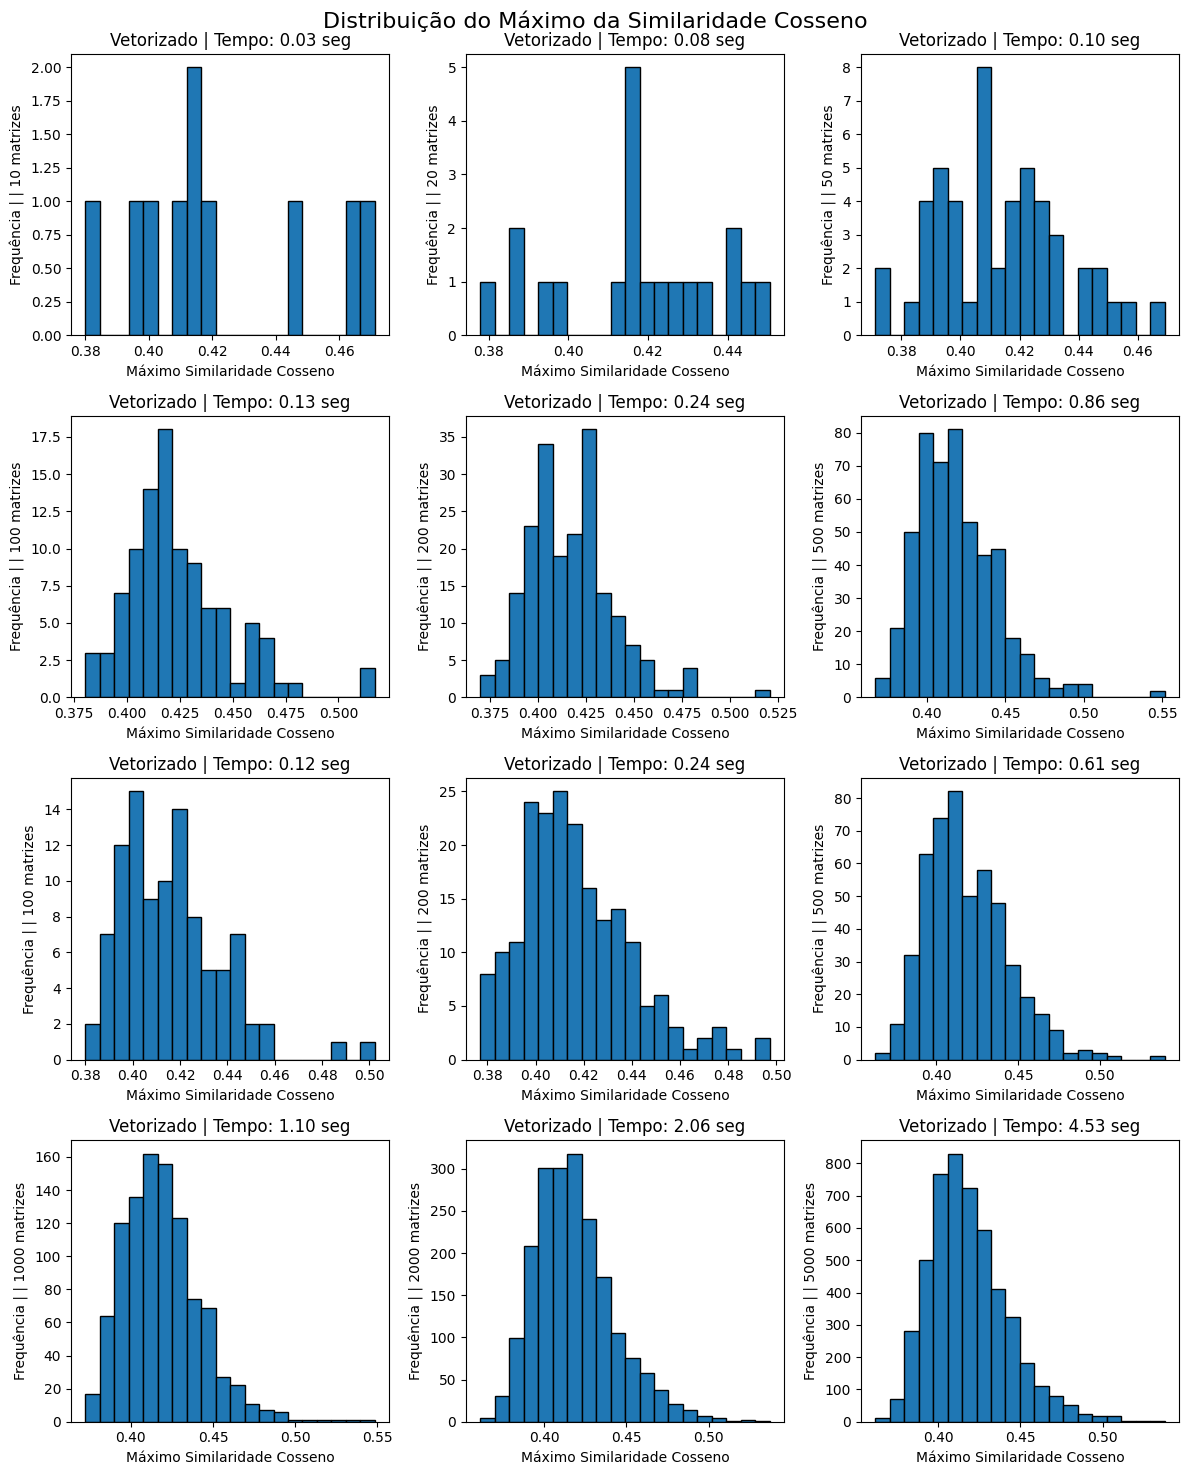

In [8]:
ks = [10, 20,50, 100, 200, 500, 100, 200, 500, 1000, 2000, 5000]

plt.figure(figsize=(12, 15))
i = 0

# < Método verotizado >
for k in ks:
    start = time.time()

    hist_max_ks_vec = []

    for _ in range(k):
        A = np.random.normal(0, 1, (100, 300))

        norms = np.linalg.norm(A, axis=0)
        A_normalizado = A / norms

        S = np.abs(A_normalizado.T @ A_normalizado)
        np.fill_diagonal(S, 0)
    
        hist_max_ks_vec.append(np.max(S))

    end = time.time()
    tempo_vec = end - start
    i += 1
    
    # Plota histograma
    plt.subplot(4, 3, i)
    plt.hist(hist_max_ks_vec, bins=20, edgecolor='black')
    plt.title(f"Vetorizado | Tempo: {tempo_vec:.2f} seg")
    plt.xlabel("Máximo Similaridade Cosseno")
    plt.ylabel(f"Frequência | | {k} matrizes")

plt.suptitle("Distribuição do Máximo da Similaridade Cosseno", fontsize=16)
plt.tight_layout()


In [ ]:
ks = list(range(10, 5001, 5))
maximos_por_k = []

for k in ks:
    hist_max_ks_vec = []

    for _ in range(k):
        A = np.random.normal(0, 1, (100, 300))

        norms = np.linalg.norm(A, axis=0)
        A_normalizado = A / norms

        S = np.abs(A_normalizado.T @ A_normalizado)
        np.fill_diagonal(S, 0)

        hist_max_ks_vec.append(np.max(S))

    # Guarda o máximo dos máximos para esse k
    maximos_por_k.append(np.max(hist_max_ks_vec))

plt.figure(figsize=(10, 6))
plt.plot(ks, maximos_por_k)
plt.xlabel("k (número de simulações)")
plt.ylabel("Máximo dos produtos internos")
plt.title("Crescimento do valor máximo de ⟨Ai, Aj⟩ com mais simulações")
plt.grid(True)
plt.show()

 Tomando $K$ o número de matrizes $A_{n,m}$ calculadas, por iteração, calculamos $\frac{m(m-1)}{2}$ produtos internos, cada produto interno tem custo assintótico $n$, chegamos que a complexidade computacional de calcular o máximo acima, será $O(K\frac{m(m-1)}{2}n)$ o que assintoticamente seria $O(Km²n)$ ou $O(m²n)$ por iteração.
   
Foi computado a similariade do cosseno das colunas de $A_{100,300}$ para matrizes distintas de duas formas: a primeira é o "método didático" que usa várias estruturas de repetição em python, sem se importar com a performática do código; a segunda forma, mais otimizada, normaliza as colunas de A previamente, pode-se fazer isso pois a similaridade do cosseno não é afetado pelo tamanho do vetor, assim com vetores normalizados passamos de $cos(\theta) = \frac{ | \langle A_i A_j \rangle |}{||A_i||||A_j||}$ para $cos(\theta) = | \langle A_i A_j \rangle |$, o que justifica fazer $A^TA$, pois cada entrada $i$, $j$ desta matriz será o produto interno das colunas $i$ e $j$ de $A$ (temos que zerar a diagonal no processo pois queremos apenas produtos internos de colunas distintas)
    
Máximo e sperado teórico seria 1, pois o $cos(\theta) = \frac{| \langle x, x \rangle |}{|| x || || x ||} = 1 = \cos(0)$, porém isso só é possível quando a matriz rand.uniform gera duas colunas iguais, não é impossível, só extremamente improvável. Na prática o que observamos é que consistentemente a partir de $K = 500$, máximos $\ge 0,54$, sem grande variância a partir disso! 